# Data Aggregation
---

In this course, ___we'll learn the following___:

- Data aggregation
- How to combine data
- How to transform data
- How to clean strings with pandas
- How to handle missing and duplicate data

Throughout this course, we'll work to answer the following questions:

- How can __aggregating the data give__ us __more insight__ into happiness scores?
- How did world __happiness change__ from 2015 to 2017?
- Which __factors contribute the most__ to the happiness score?

### Instructions

1. Use the __`pd.read_csv()`__ function to read the `World_Happiness_2015.csv` file into a dataframe called __`happiness2015`__.
2. Store the first five rows of the dataframe in a __`variable`__ called __`first_5`__.
3. Use the __`DataFrame.info()`__ method to print information about the dataframe.
4. After you have run your code, use the variable inspector to look at the variable `first_5` and the output to get familiar with the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
%matplotlib inline

In [2]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2015.index.name = None

first_5 = happiness2015.head()

happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


### Instructions

1. Create an empty dictionary named __`mean_happiness`__ to store the results of this exercise.
2. Use the __`Series.unique()`__ method to create an array of unique values for the __`Region` column__.
3. Use a for __loop to iterate over the unique region values from the `Region` column.
4. Assign the rows belonging to the current region to a variable named __`region_group`__.
5. Use the __`Series.mean()`__ method to calculate the mean happiness score for __`region_group`__.
6. Assign the mean value to the __`mean_happiness dictionary`__, using the region name as the key and the mean happiness score as the value.

In [3]:
# step 1 –  creating an array of unique values for the Region

regions = happiness2015.Region.unique() 

# step 2 – loop

mean_happiness = {}

for i in regions:
    # Split the dataframe into groups.
    region_group = happiness2015[happiness2015["Region"] == i]
    #Apply a function to each group.
    region_mean = region_group["Happiness Score"].mean()
    mean_happiness[i] = region_mean

In [4]:
print(mean_happiness)

{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.144681818181818, 'Southeastern Asia': 5.317444444444445, 'Central and Eastern Europe': 5.332931034482758, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.202800000000001, 'Southern Asia': 4.580857142857143}


### Instructions

For the following exercise, use the result from the dictionary returned by `grouped.groups` shown below:

   __`North America': Int64Index([4, 14], dtype='int64`__

1. Prove that the values for the __`'North America'` group__ in the dictionary returned by __`grouped.groups`__ above correspond to countries in North America in the `happiness2015` dataframe.
    1. Use the snippet above to identify the indexes of the countries in `happiness2015` that belong to the `North America` group.
    2. se the indexes to assign just the countries in `North America` in `happiness2015` to `north_america`.
2. Use the __`GroupBy.get_group()`__ method to select the data for the __`North America` group only__. Assign the result to __`na_group`__.
3. Use the following code to compare north_america and na_group: `north_america == na_group`. Assign the result to `equal`.

In [5]:
grouped = happiness2015.groupby('Region')
grouped.groups
na_group = grouped.get_group('North America')
north_america = happiness2015.iloc[[4, 14]]
equal = north_america == na_group
print(equal)

    Country  Region  Happiness Rank  Happiness Score  Standard Error  \
4      True    True            True             True            True   
14     True    True            True             True            True   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
4                       True    True                      True     True   
14                      True    True                      True     True   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
4                            True        True               True  
14                           True        True               True  


### Instructions

Apply the __`GroupBy.mean()`___ method to grouped. Assign the result to `means`.

In [6]:
means = grouped.mean()
means.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009


### Instructions

1. Select just the Happiness Score column from grouped. Assign the result to __`happy_grouped`__.
2. Use the __`GroupBy.mean()`__ method to compute the mean of __`happy_grouped`__. Assign the result to __`happy_mean`__.

In [7]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

### Instructions
1. Apply the __`GroupBy.agg()`__ method to `happy_grouped`. 
2. Pass a __list containing `np.mea`n and `np.max`__ into the method. 
3. Assign the result to __`happy_mean_max`__.
    - As noted above, passing __`'mean'` and `'max'` into the `GroupBy.agg()` method will also return the same results.__
    - However, __for answer checking purposes, you'll have to use `np.mean` and `np.max`.__

- We've also created a custom function named __`dif`__ to calculate the difference between the mean and maximum values. __Pass `dif` into the `GroupBy.agg()` method. Assign the result to `mean_max_dif`.__

In [8]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())

In [9]:
happy_mean_max1 = happy_grouped.agg(['mean', 'max']) # 1st solutions 
happy_mean_max2 = happy_grouped.agg([np.mean, np.max]) # 2nd solutions 

mean_max_dif = happy_grouped.agg(dif)

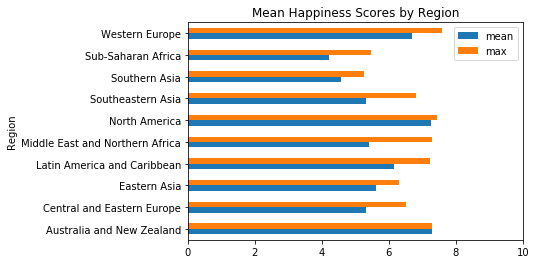

In [10]:
# experimenting with a visualisation
happy_mean_max1.plot.barh(title='Mean Happiness Scores by Region', xlim = (0,10));

### Instructions

Inspect the following code:
    __`happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()`__

- If we run the code above, will the index of __`happiness_means`__ be the unique values in the Region column or the Happiness Score column?
- Will the values aggregated in __`happiness_means`__ be the values from the Region column or the Happiness Score column?
- Print __`happiness_means`__. Were your predictions correct?

In [11]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()

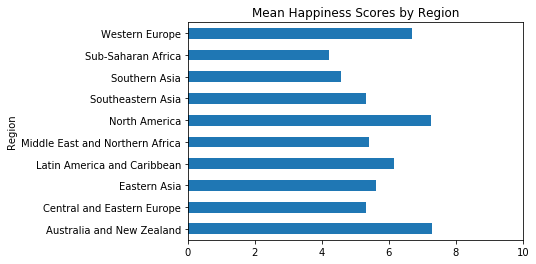

In [12]:
happiness_means.plot.barh(title='Mean Happiness Scores by Region', xlim = (0,10));

---
## Instructions

_We've already updated `pv_happiness` by setting the __`margins` parameter equal to `True`__._

1. Plot the resulting dataframe, __`pv_happiness`, using the `df.plot()`__ method:
     - set kind to `barh`, `xlim`to `(0,10)`
     - `title` to `'Mean Happiness Scores by Region'`
     - `legend` to `False`. 
_What do you notice about this results?_

2. Calculate the __mean of the Happiness Score column in the original happiness 2015 data set__. Assign the result to __`world_mean_happiness`__.
_Does world_mean_happiness equal the value for the All group? If you can't figure out the answer, don't worry! We'll review this question on the next screen._

#### Solution:

In [13]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
# when we set the margins parameter equal to True, All will be added to the index of the resulting dataframe

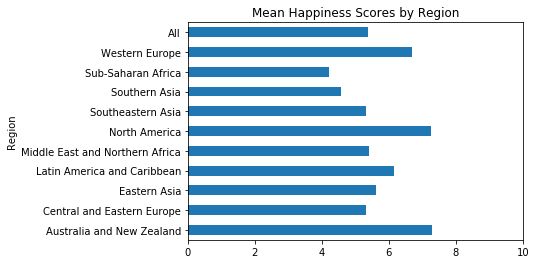

In [14]:
pv_happiness.plot.barh(title = 'Mean Happiness Scores by Region', xlim = (0,10), legend = False);

### Instructions

#### 1. `df.groupby( )` method:

_Use the __`df.groupby()`__ method to calculate the minimum, maximum, and __`mean` family and happiness scores__ for each region in `happiness2015`._
- Group happiness2015 by the Region column.
- Select the Happiness Score and Family columns. Assign the result to grouped.
- Apply the GroupBy.agg() method to grouped. Pass a list containing np.min, np.max, and np.mean into the method.
- Assign the result to happy_family_stats.
---

#### 2. `df.pivot_table( )` method:

_Use the pivot_table method to return the same information, but also calculate the the minimum, maximum, and mean for the entire Family and Happiness Score columns._

- The aggregation columns should be Happiness Score and Family.
- The column to group by is Region.
- The aggregation functions are np.min, np.max, and np.mean.
- Set the margins parameter equal to True.
- Assign the result to pv_happy_family_stats.

In [15]:
happiness_means = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = happiness_means.agg([np.min, np.max, np.mean])

# the same code in one line
happy_family_stats_2 = happiness2015.groupby('Region')[['Happiness Score', 'Family']].agg([np.min, np.max, np.mean])

In [16]:
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc = [np.min, np.max, np.mean], margins=True)

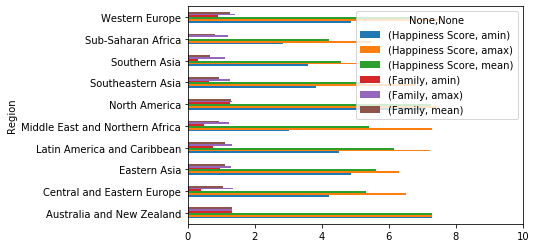

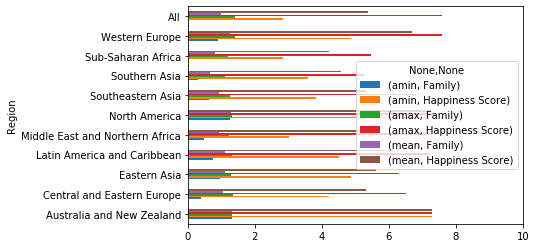

In [17]:
happy_family_stats.plot.barh(xlim = (0,10))
pv_happy_family_stats.plot.barh(xlim = (0,10));

---- - - 
#### - - - done - - - 